# Freshness Detection Of Fruits and Vegetables


### Installing and importing libraries needed
1. Using yolov11 for Object Detection.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 26.7 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import Image

In [4]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


Downloading Dataset ->
1.https://universe.roboflow.com/tomato-ripeness-detector-2h0g6/tomato-ripeness-detector-1qh4c
2. https://universe.roboflow.com/rohan-9k6gc/potato-ce1hp-hwowe
3.https://universe.roboflow.com/fruit-ripening/fruit-ripening-process

Need more dataset for improvement in the model.

In [6]:
from roboflow import Roboflow

In [7]:
rf = Roboflow(api_key="nYlhQcXOt3mvr7zv2byS")
project = rf.workspace("tomato-ripeness-detector-2h0g6").project("tomato-ripeness-detector-1qh4c")
version = project.version(4)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tomato-Ripeness-Detector-4 in yolov11:: 100%|██████████| 728/728 [00:00<00:00, 6498.99it/s]


In [12]:
rf = Roboflow(api_key="nYlhQcXOt3mvr7zv2byS")
project = rf.workspace("rohan-9k6gc").project("potato-ce1hp-hwowe")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Potato-1 in yolov11:: 100%|██████████| 5418/5418 [00:05<00:00, 916.25it/s]


In [8]:
rf = Roboflow(api_key="nYlhQcXOt3mvr7zv2byS")
project = rf.workspace("fruit-ripening").project("fruit-ripening-process")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruit-Ripening-Process-2 in yolov11:: 100%|██████████| 36160/36160 [00:08<00:00, 4357.48it/s]


Checking dataset location

In [9]:
dataset.location

'/content/Fruit-Ripening-Process-2'

Training on Custom Dataset

In [10]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 111MB/s]
Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Fruit-Ripening-Process-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

Checking results like confusion matrix, f1-scores

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png")

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

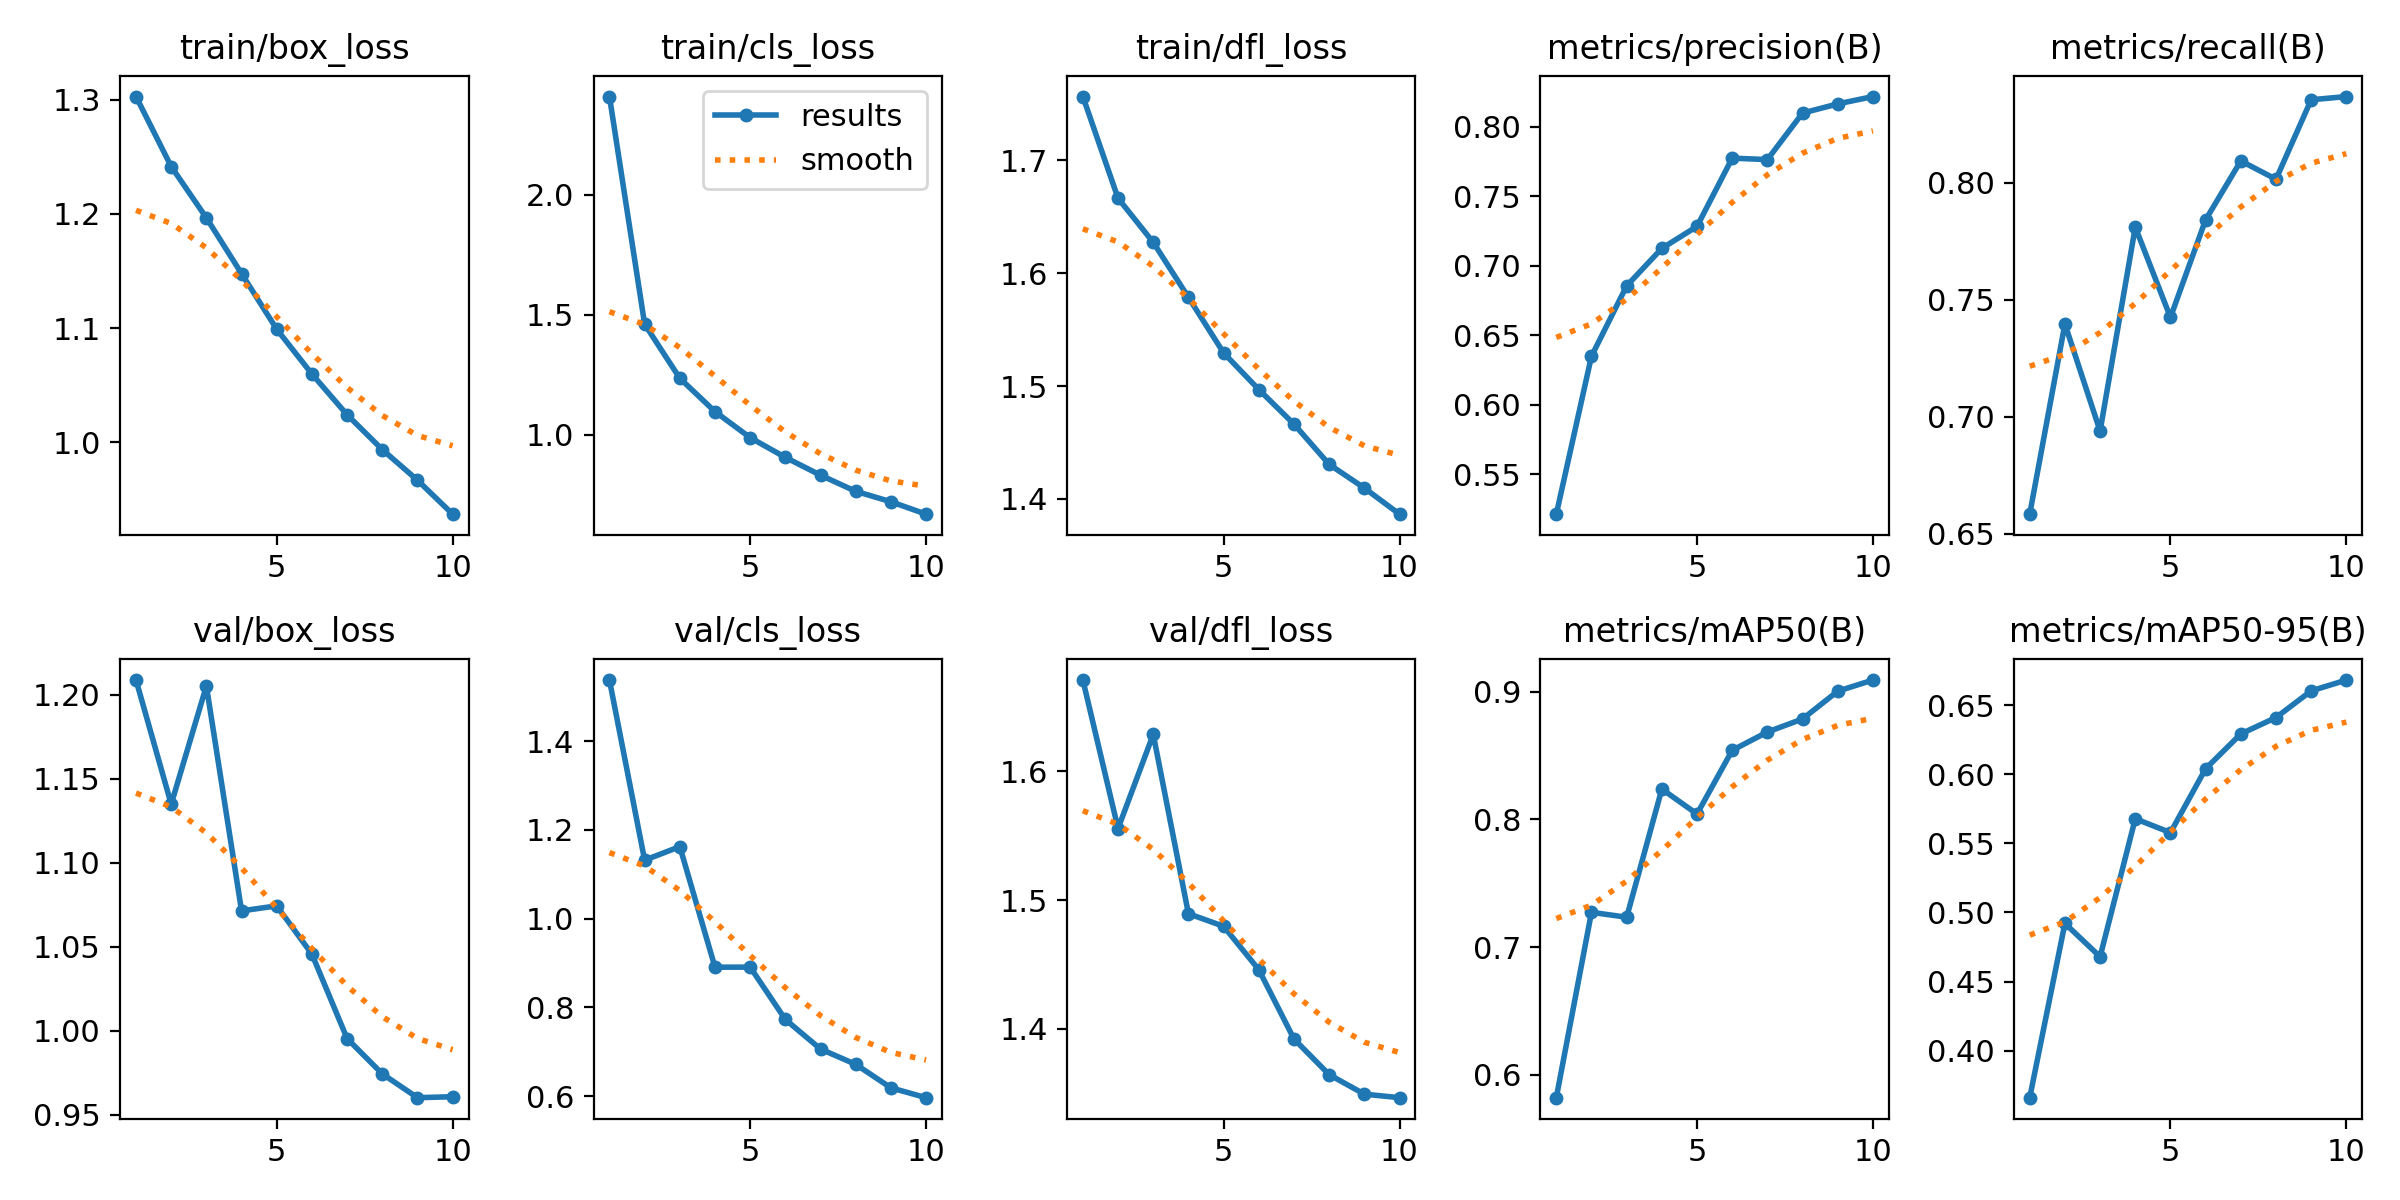

In [11]:
Image("/content/runs/detect/train/results.png", width=600)

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg")

Validate fine-tuned Model

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml > output.txt

In [ ]:
import pandas as pd
import re

# Function to parse the output
def parse_yolo_output(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    for line in lines:
        # Use regex to match the relevant data lines
        match = re.match(r'(.+?)\s+(\d+)\s+(\d+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)', line)
        if match:
            data.append(match.groups())

    # Create a DataFrame from the parsed data
    df = pd.DataFrame(data, columns=['Class', 'TP', 'FP', 'Precision', 'Recall', 'F1-Score', 'mAP@0.5'])
    df['TP'] = pd.to_numeric(df['TP'])
    df['FP'] = pd.to_numeric(df['FP'])
    df['Precision'] = pd.to_numeric(df['Precision'])
    df['Recall'] = pd.to_numeric(df['Recall'])
    df['F1-Score'] = pd.to_numeric(df['F1-Score'])
    df['mAP@0.5'] = pd.to_numeric(df['mAP@0.5'])

    return df

# Parse the YOLO output file
output_df = parse_yolo_output('output.txt')

# Display the DataFrame as a table
output_df.sort_values(by='Class', inplace=True)
output_df.reset_index(drop=True, inplace=True)
import numpy as np

# Display the formatted DataFrame
import IPython
IPython.display.display(output_df)


Inference on custom Model

In [14]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/219 /content/Potato-1/test/images/-2-_jpg.rf.48696689072b4e3671dd3ad314ebc1ff.jpg: 480x640 2 freshripes, 5 ripes, 46.9ms
image 2/219 /content/Potato-1/test/images/1-povishaem_yrozhai_kartofelja_av_jpg.rf.ece89f4d35f956aa9a83f3a8d226ae24.jpg: 352x640 1 freshunripe, 50.2ms
image 3/219 /content/Potato-1/test/images/206_jpg.rf.15c31092dd2a2a84d2ebafc713f2b3d7.jpg: 544x640 1 freshunripe, 40.9ms
image 4/219 /content/Potato-1/test/images/210_jpg.rf.ec019eab4f77063946f4c270213e89b0.jpg: 640x640 2 freshripes, 1 ripe, 9.0ms
image 5/219 /content/Potato-1/test/images/24_jpg.rf.ca921419587c9f63cdb3cb86281c470d.jpg: 640x640 1 freshripe, 2 ripes, 8.1ms
image 6/219 /content/Potato-1/test/images/255_jpg.rf.0f61d79e9d5cd3234aa6720bd5a1a401.jpg: 640x640 1 ripe, 7.9ms
image 7/219 /content/Potato-1/test/images/265_jpg.rf.df2555bb39dfec

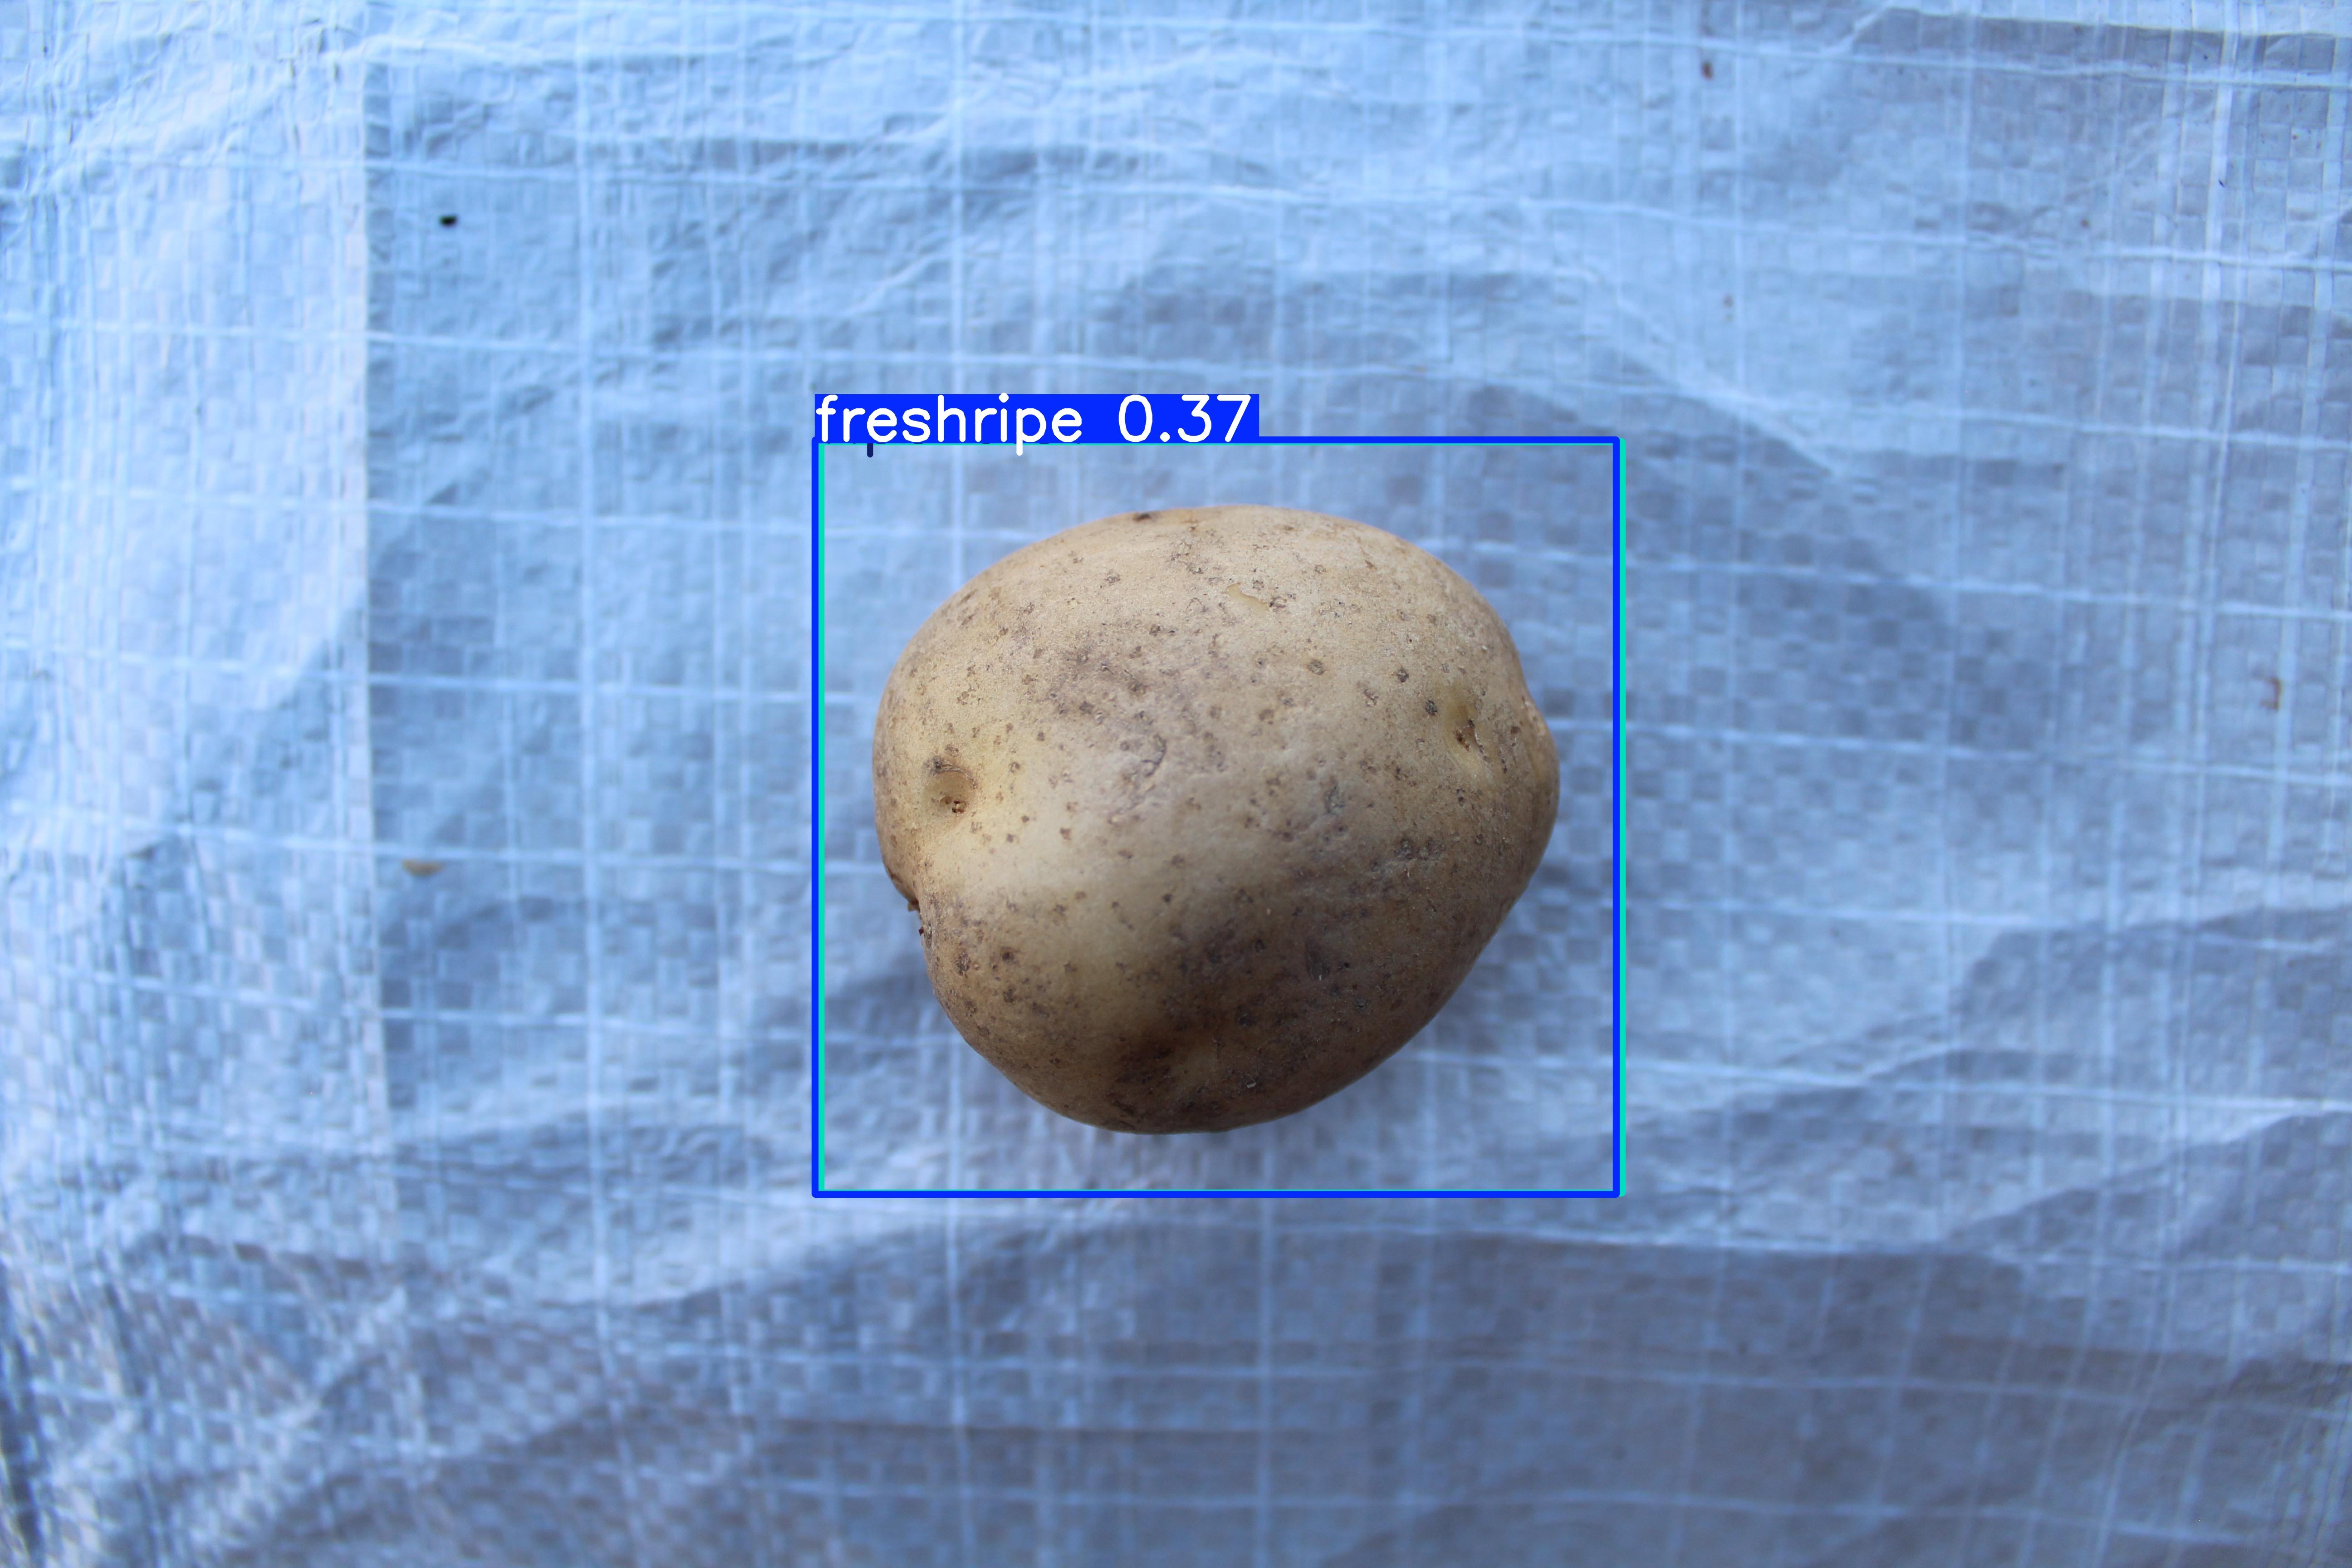

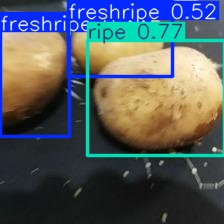

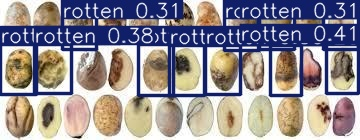

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

Custom Image Testing
0. Download the photo
(can use ` !gdown "url" `
1. ` !yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images `

change the source here.
`source = 0` to access local camera

In the above part, I have classified fruits and vegetable if the it is fresh or not.